In [9]:
# -*- encoding: utf-8 -*-
import sys
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# env: windows
PATH_IMAGE = 'D:\\My_Data\\me_Docs\\Masterarbeit\\master_border_extraction\\images\\test1.png'
img_origin_color = cv2.imread(PATH_IMAGE, cv2.IMREAD_COLOR)  # color image
img_origin_gray = cv2.imread(PATH_IMAGE, cv2.IMREAD_GRAYSCALE) # gray image

Infos

In [17]:
dimensions = img_origin_color.shape
print(dimensions) # (2064, 3088, 3) => height, width pixels, channels 

(2064, 3088, 3)


Show image: color & grayscale

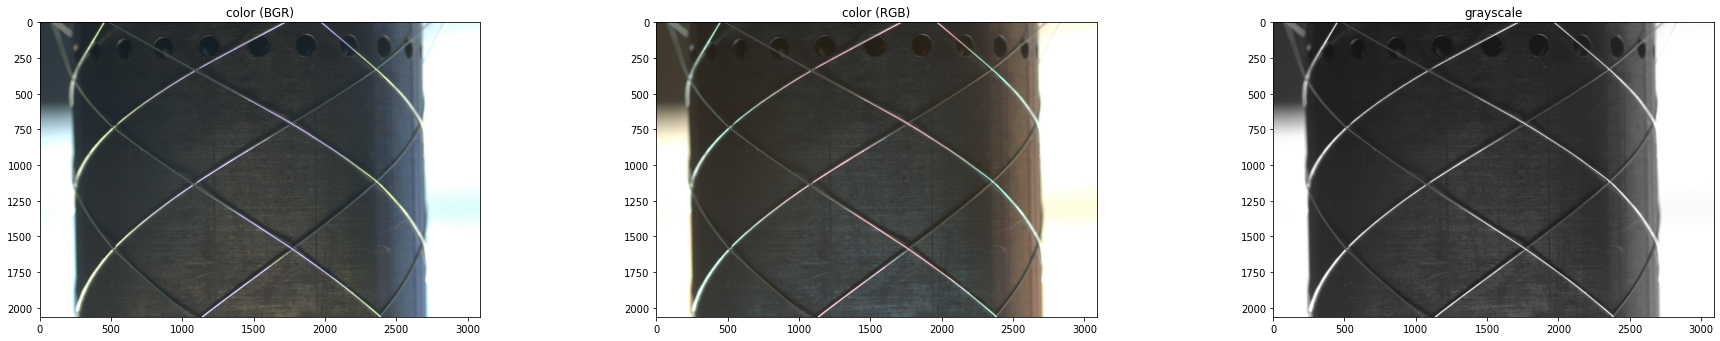

In [15]:
plt.figure(num=1, figsize=(30, 60))
plt.subplots_adjust(wspace=0.4, hspace=0.4) # adjust the distance between subplots
plt.subplot(1, 3, 1)
plt.title('color (BGR)')
plt.imshow(img_origin_color)  # b-g-r color image

img_rgb = cv2.cvtColor(img_origin_color, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 2)
plt.title('color (RGB)')
plt.imshow(img_rgb)

plt.subplot(1, 3, 3)
plt.title('grayscale')
plt.imshow(img_origin_gray, cmap='gray')

# 1 For grayscale

1. Check: Histogramm

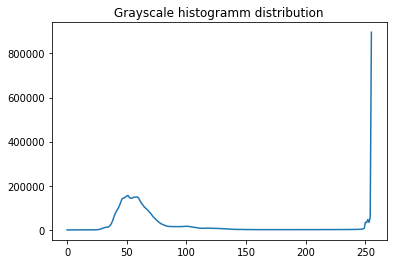

In [26]:
hist_gray = cv2.calcHist([img_origin_gray],[0],None,[256],[0,256])   # shape is (256, 1)
plt.title('Grayscale histogramm distribution')
plt.plot(hist_gray)

!!! TODOs
- [1] discover the meaning of two parts
- [2] set the left part to 0 => check the effect

2.1 Equalization (HE)

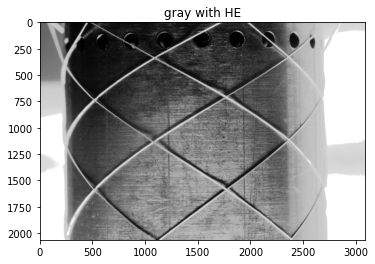

In [29]:
equ_gray = cv2.equalizeHist(img_origin_gray)
plt.title('gray with HE')
plt.imshow(equ_gray, cmap='gray')

2.2 Contrast Limited AHE (CLAHE)

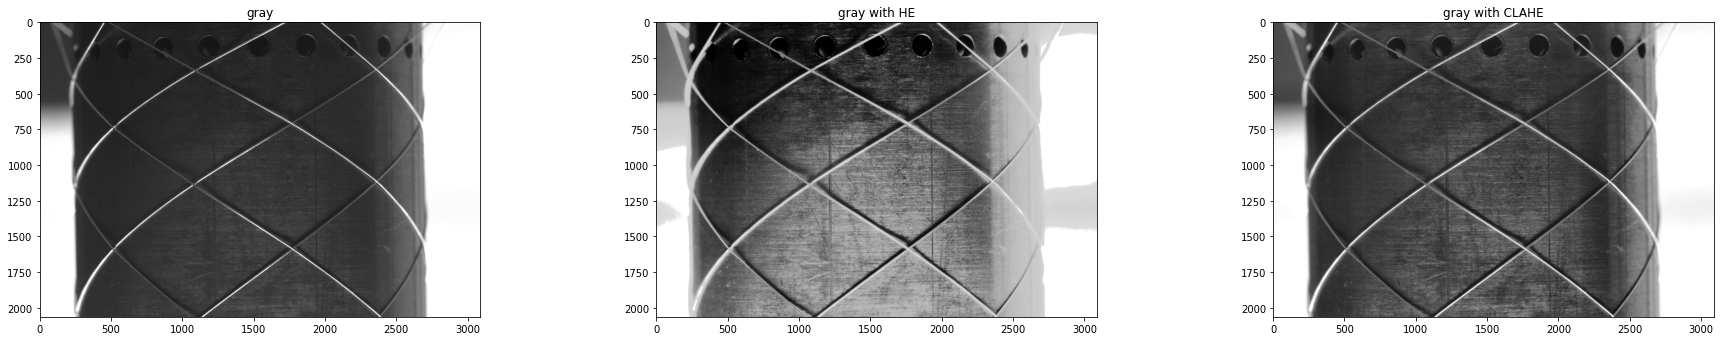

In [31]:
# grayscale
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray = clahe.apply(img_origin_gray)

plt.figure(num=2, figsize=(30, 60))

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1, 3, 1)
plt.title('gray')
plt.imshow(img_origin_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('gray with HE')
plt.imshow(equ_gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('gray with CLAHE')
plt.imshow(clahe_gray, cmap='gray')

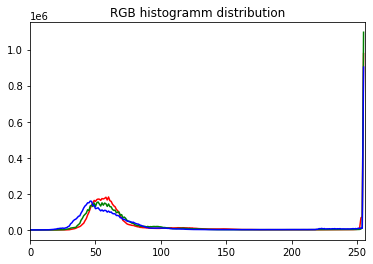

In [3]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('RGB histogramm distribution')
plt.show()

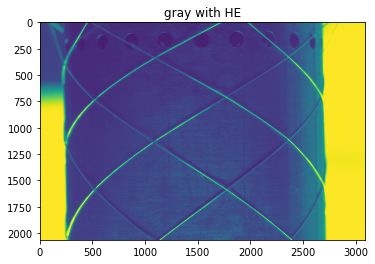

In [4]:
gray_bgr = cv2.cvtColor(image_origin,cv2.COLOR_BGR2GRAY)
equ_gray_bgr = cv2.equalizeHist(gray_bgr)
plt.title('gray with HE')
plt.imshow(gray_bgr)

# gray_rgb = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# equ_gray_rgb = cv2.equalizeHist(gray_rgb)
# plt.imshow(gray_rgb)

Q：why this grayscale image looks like a color image?

In [5]:
# grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
equ_gray = cv2.equalizeHist(gray)

# color
(r, g, b) = cv2.split(image)
rH = cv2.equalizeHist(r)
gH = cv2.equalizeHist(g)
bH = cv2.equalizeHist(b)
# merge channels
equ_rgb = cv2.merge((rH, gH, bH))

Text(0.5, 1.0, 'color (RGB) with HE')

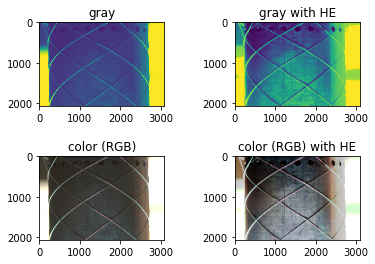

In [6]:
plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.6) 
plt.subplot(2, 2, 1)
plt.imshow(gray)
plt.title('gray')

plt.subplot(2, 2, 2)
plt.imshow(equ_gray)
plt.title('gray with HE')

plt.subplot(2, 2, 3)
plt.imshow(image)
plt.title('color (RGB)')

plt.subplot(2, 2, 4)
plt.imshow(equ_rgb)
plt.title('color (RGB) with HE')

- 2) CLAHE: Contrast Limited AHE

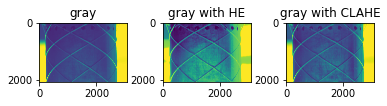

In [7]:
# grayscale
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray = clahe.apply(gray)
plt.figure()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1, 3, 1)
plt.title('gray')
plt.imshow(gray)

plt.subplot(1, 3, 2)
plt.title('gray with HE')
plt.imshow(equ_gray)

plt.subplot(1, 3, 3)
plt.title('gray with CLAHE')
plt.imshow(clahe_gray)

Function: trackbar()

In [9]:
cv2.namedWindow('controls CLAHE', 0)
#cv2.resizeWindow("controls CLAHE", 30, 30)  
cv2.imshow('controls CLAHE',gray)
# while True:
# cv2.waitKey()


: 

In [9]:
# trackbar callback fucntion does nothingtrackbar callback fucntion does nothing
def nothing(x):
    pass

cv2.namedWindow('controls CLAHE', 0)
cv2.resizeWindow("controls CLAHE", 300, 300)  

cv2.createTrackbar('clipLimit','controls CLAHE',1,16,nothing)
cv2.createTrackbar('tileGridSize_width','controls CLAHE',1,16,nothing)
cv2.createTrackbar('tileGridSize_height','controls CLAHE',1,16,nothing)

while True:
    clipLimit = float(cv2.getTrackbarPos('clipLimit','controls CLAHE'))
    tileGridSize_width = int(cv2.getTrackbarPos('tileGridSize_width','controls CLAHE'))
    tileGridSize_height = int(cv2.getTrackbarPos('tileGridSize_height','controls CLAHE'))
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize_width,tileGridSize_height))
    clahe_gray = clahe.apply(gray)
    
    cv2.imshow('controls CLAHE',clahe_gray)

    # cv2.waitkey(10)
    # waitfor the user to press `Esc` and break the while loop 
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
	    break

error: Unknown C++ exception from OpenCV code

: 

2 Smooth
- joint bilateral filter
- guided image Filter

3 Scharpening
- color: 
    - V in HSV
    - Y in YCbCr
- grayscale

In [ ]:
name = 'dinggen'
print(f'hello {name}')

In [ ]:
sub_dirs[1]

In [ ]:
src_path = os.path.join(old_path, sub_dirs[1])
dst_path = os.path.join(new_path, sub_dirs[1])
print(src_path, dst_path)

In [ ]:
os.listdir(src_path)

In [ ]:
for sub_dir in sub_dirs:
    print(f'The subdirectory is {sub_dir}.')
    src_path = os.path.join(old_path, sub_dir)
    dst_path = os.path.join(new_path, sub_dir)

    if not os.path.isdir(dst_path):
        os.makedirs(dst_path)
    
    files = [f for f in os.listdir(src_path) if f.con]
    files_num = len(files)
    # choose 20 images in each folder
    choose_files_index = list(range(0, files_num, files_num//19))

    for index in choose_files_index:
        src_file = os.path.join(src_path, files[int(index)])
        copy(src_file, dst_path)

In [ ]:
lst[idx]